In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 15,10


In [2]:
cols_list=['baseline_name','baseline_type']
movement_df = pd.read_csv("data/movement_ken.csv")
movement_df.tail()

,Unnamed: 0,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
21660,2592445,2020-12-10,KEN,GADM,KEN.9.1_1,Isiolo North,-0.04408,0.15741,full_february,DAY_OF_WEEK
21661,2592446,2020-12-11,KEN,GADM,KEN.9.1_1,Isiolo North,0.01453,0.16013,full_february,DAY_OF_WEEK
21662,2592447,2020-12-16,KEN,GADM,KEN.9.1_1,Isiolo North,0.12100,0.11263,full_february,DAY_OF_WEEK
21663,2592448,2020-12-18,KEN,GADM,KEN.9.1_1,Isiolo North,0.12762,0.15152,full_february,DAY_OF_WEEK
21664,2592449,2020-12-29,KEN,GADM,KEN.9.1_1,Isiolo North,0.02708,0.15896,full_february,DAY_OF_WEEK


In [3]:
counties_df = pd.read_csv('data/other_subcounties_counties.csv')
counties_df.head()

,Unnamed: 0,county,constituencies
0,0,MOMBASA,CHANGAMWE
1,1,MOMBASA,JOMVU
2,2,MOMBASA,KISAUNI
3,3,MOMBASA,LIKONI
4,4,MOMBASA,MVITA (MOMBASA)


In [4]:
# merge counties
movement_df['polygon_name_upper'] = movement_df['polygon_name'].str.upper()
movement_merged_df = movement_df.merge(counties_df, how='left', left_on='polygon_name_upper', right_on='constituencies')
movement_merged_df.head()


,Unnamed: 0_x,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type,polygon_name_upper,Unnamed: 0_y,county,constituencies
0,2570785,2020-03-01,KEN,GADM,KEN.10.1_1,Kajiado Central,-0.14277,0.16011,full_february,DAY_OF_WEEK,KAJIADO CENTRAL,215,KAJIADO,KAJIADO CENTRAL
1,2570786,2020-03-02,KEN,GADM,KEN.10.1_1,Kajiado Central,-0.18758,0.09824,full_february,DAY_OF_WEEK,KAJIADO CENTRAL,215,KAJIADO,KAJIADO CENTRAL
2,2570787,2020-03-03,KEN,GADM,KEN.10.1_1,Kajiado Central,-0.07280,0.12918,full_february,DAY_OF_WEEK,KAJIADO CENTRAL,215,KAJIADO,KAJIADO CENTRAL
3,2570788,2020-03-04,KEN,GADM,KEN.10.1_1,Kajiado Central,-0.02168,0.10025,full_february,DAY_OF_WEEK,KAJIADO CENTRAL,215,KAJIADO,KAJIADO CENTRAL
4,2570789,2020-03-05,KEN,GADM,KEN.10.1_1,Kajiado Central,-0.01348,0.11649,full_february,DAY_OF_WEEK,KAJIADO CENTRAL,215,KAJIADO,KAJIADO CENTRAL


In [5]:
movement_merged_df.columns

Index(['Unnamed: 0_x', 'ds', 'country', 'polygon_source', 'polygon_id',
       'polygon_name', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'baseline_name', 'baseline_type',
       'polygon_name_upper', 'Unnamed: 0_y', 'county', 'constituencies'],
      dtype='object')

In [6]:
movement_merged_df = movement_merged_df[['ds', 'polygon_name', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'county']]
movement_merged_df.head()

,ds,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,county
0,2020-03-01,Kajiado Central,-0.14277,0.16011,KAJIADO
1,2020-03-02,Kajiado Central,-0.18758,0.09824,KAJIADO
2,2020-03-03,Kajiado Central,-0.07280,0.12918,KAJIADO
3,2020-03-04,Kajiado Central,-0.02168,0.10025,KAJIADO
4,2020-03-05,Kajiado Central,-0.01348,0.11649,KAJIADO


In [7]:
movement_merged_df[movement_merged_df['county'].isnull()]

,ds,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,county


## **Data distribution**

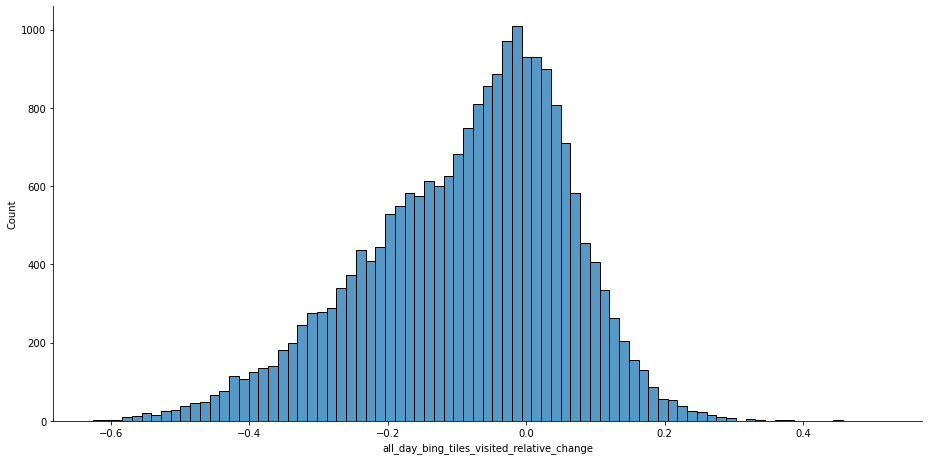

In [8]:
plt.rcParams["figure.figsize"] = (15,10)
sns.displot(data=movement_merged_df, x='all_day_bing_tiles_visited_relative_change', height=6.5, aspect=2)

## **Relationship Analysis**

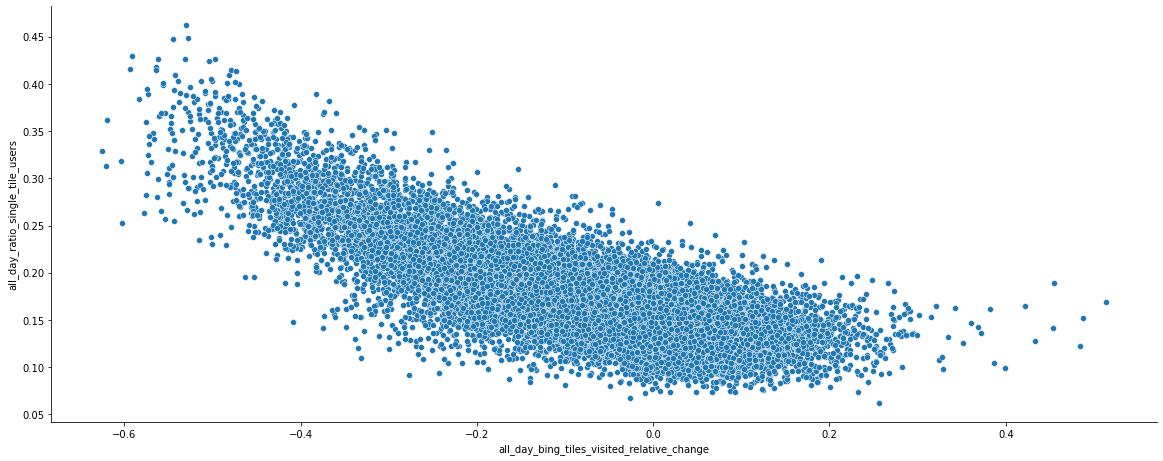

In [9]:
sns.relplot(data=movement_merged_df,x='all_day_bing_tiles_visited_relative_change', y='all_day_ratio_single_tile_users', height=6.5, aspect=2.5)


### **Categorical**

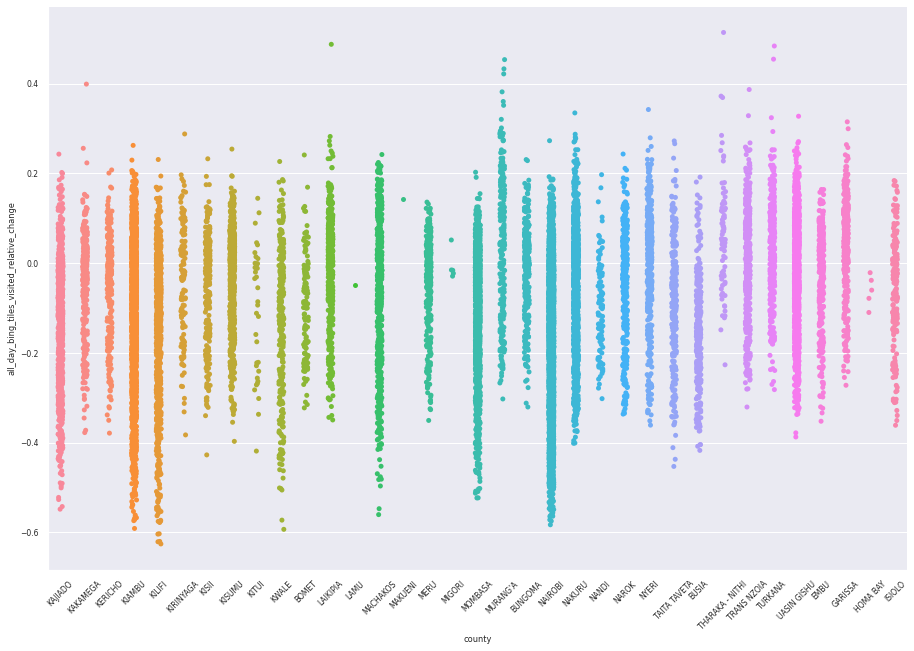

In [10]:
sns.set(font_scale = 0.69)
sns.catplot(x="county", y="all_day_bing_tiles_visited_relative_change", data=movement_merged_df, height=8.5, aspect=1.5)
_ = plt.xticks(rotation=45)

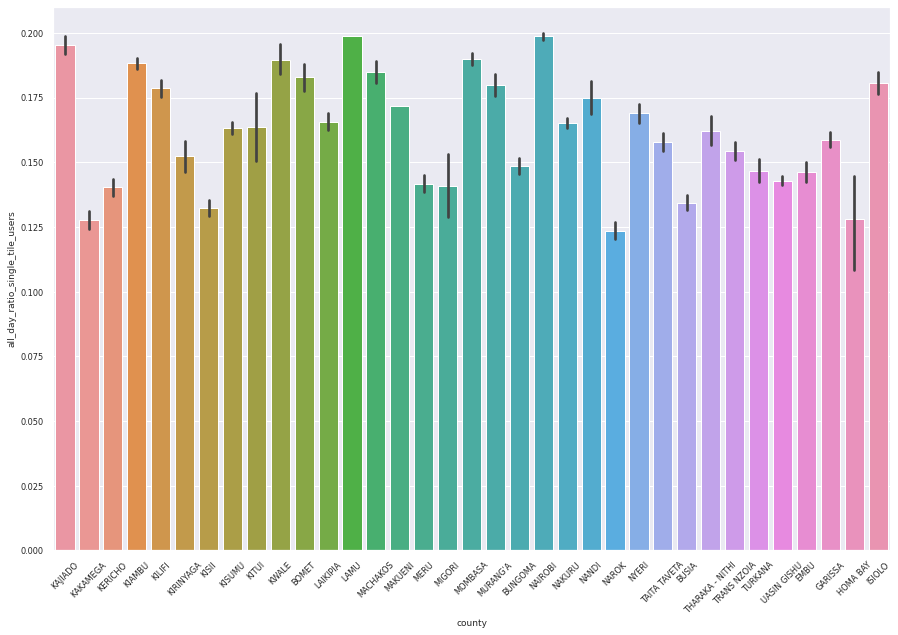

In [11]:
sns.set(font_scale = 0.75)
sns.barplot(data=movement_merged_df, y='all_day_ratio_single_tile_users', x='county')
_ = plt.xticks(rotation=45)


### Population Analysis

In [12]:
population_df = pd.read_csv("data/region_pop.csv")
population_df.tail()

,region_name,male_population,female_population,intersex_population,total_population,population_density
392,MAKADARA,96369.0,93157.0,NaN,189536.0,16150.0
393,MATHARE,106522.0,100028.0,NaN,206564.0,68940.0
394,NJIRU,307642.0,318809.0,NaN,626482.0,4821.0
395,STAREHE,109173.0,101238.0,NaN,210423.0,10205.0
396,WESTLANDS,153818.0,155021.0,NaN,308854.0,3167.0


In [13]:
movement_merged_df['polygon_name_upper'] = movement_merged_df['polygon_name'].str.upper()
movement_merged_df

,ds,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,county,polygon_name_upper
0,2020-03-01,Kajiado Central,-0.14277,0.16011,KAJIADO,KAJIADO CENTRAL
1,2020-03-02,Kajiado Central,-0.18758,0.09824,KAJIADO,KAJIADO CENTRAL
2,2020-03-03,Kajiado Central,-0.07280,0.12918,KAJIADO,KAJIADO CENTRAL
3,2020-03-04,Kajiado Central,-0.02168,0.10025,KAJIADO,KAJIADO CENTRAL
4,2020-03-05,Kajiado Central,-0.01348,0.11649,KAJIADO,KAJIADO CENTRAL
...,...,...,...,...,...,...
21660,2020-12-10,Isiolo North,-0.04408,0.15741,ISIOLO,ISIOLO NORTH
21661,2020-12-11,Isiolo North,0.01453,0.16013,ISIOLO,ISIOLO NORTH
21662,2020-12-16,Isiolo North,0.12100,0.11263,ISIOLO,ISIOLO NORTH
21663,2020-12-18,Isiolo North,0.12762,0.15152,ISIOLO,ISIOLO NORTH


In [14]:
movement_pop_df = movement_merged_df.merge(population_df, how='left', left_on='polygon_name_upper', right_on='region_name')
movement_pop_df = movement_pop_df[['ds', 'polygon_name', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'county', 'male_population',
       	'female_population', 'intersex_population',	'total_population',	'population_density']]
movement_pop_df

,ds,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,county,male_population,female_population,intersex_population,total_population,population_density
0,2020-03-01,Kajiado Central,-0.14277,0.16011,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0
1,2020-03-02,Kajiado Central,-0.18758,0.09824,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0
2,2020-03-03,Kajiado Central,-0.07280,0.12918,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0
3,2020-03-04,Kajiado Central,-0.02168,0.10025,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0
4,2020-03-05,Kajiado Central,-0.01348,0.11649,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0
...,...,...,...,...,...,...,...,...,...,...
21660,2020-12-10,Isiolo North,-0.04408,0.15741,ISIOLO,NaN,NaN,NaN,NaN,NaN
21661,2020-12-11,Isiolo North,0.01453,0.16013,ISIOLO,NaN,NaN,NaN,NaN,NaN
21662,2020-12-16,Isiolo North,0.12100,0.11263,ISIOLO,NaN,NaN,NaN,NaN,NaN
21663,2020-12-18,Isiolo North,0.12762,0.15152,ISIOLO,NaN,NaN,NaN,NaN,NaN


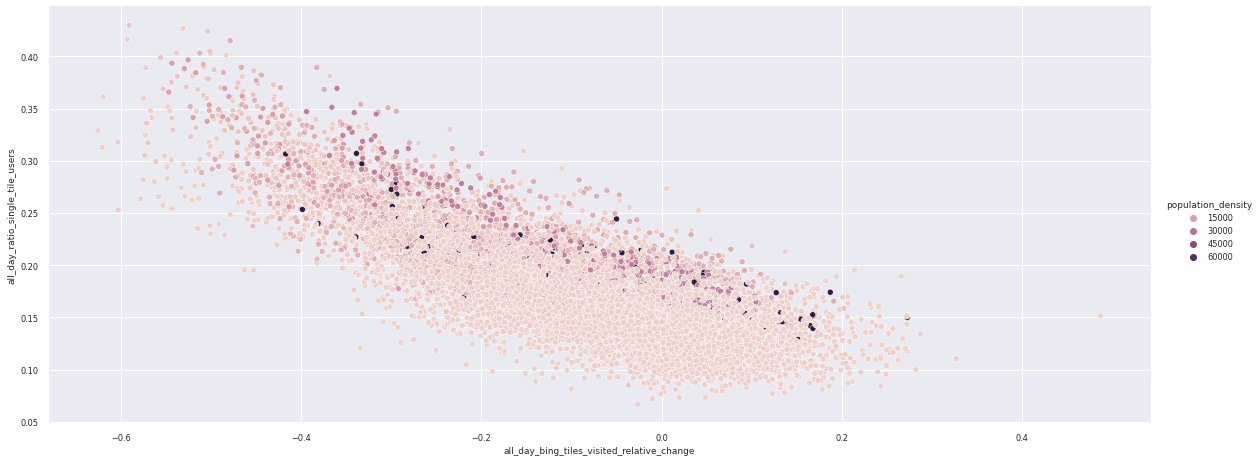

In [15]:
sns.relplot(data=movement_pop_df,x='all_day_bing_tiles_visited_relative_change', y='all_day_ratio_single_tile_users', height=6.5, aspect=2.5, hue='population_density')


In [16]:
movement_pop_df[movement_pop_df['total_population'].isnull()]

,ds,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,county,male_population,female_population,intersex_population,total_population,population_density
119,2020-03-01,Kajiado East,-0.12344,0.16372,KAJIADO,NaN,NaN,NaN,NaN,NaN
120,2020-03-02,Kajiado East,0.01359,0.13087,KAJIADO,NaN,NaN,NaN,NaN,NaN
121,2020-03-03,Kajiado East,-0.02122,0.12045,KAJIADO,NaN,NaN,NaN,NaN,NaN
122,2020-03-04,Kajiado East,0.00603,0.11899,KAJIADO,NaN,NaN,NaN,NaN,NaN
123,2020-03-05,Kajiado East,0.05006,0.13438,KAJIADO,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
21660,2020-12-10,Isiolo North,-0.04408,0.15741,ISIOLO,NaN,NaN,NaN,NaN,NaN
21661,2020-12-11,Isiolo North,0.01453,0.16013,ISIOLO,NaN,NaN,NaN,NaN,NaN
21662,2020-12-16,Isiolo North,0.12100,0.11263,ISIOLO,NaN,NaN,NaN,NaN,NaN
21663,2020-12-18,Isiolo North,0.12762,0.15152,ISIOLO,NaN,NaN,NaN,NaN,NaN


### Time Series Analysis

In [17]:
movement_merged_df.head()

,ds,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,county,polygon_name_upper
0,2020-03-01,Kajiado Central,-0.14277,0.16011,KAJIADO,KAJIADO CENTRAL
1,2020-03-02,Kajiado Central,-0.18758,0.09824,KAJIADO,KAJIADO CENTRAL
2,2020-03-03,Kajiado Central,-0.07280,0.12918,KAJIADO,KAJIADO CENTRAL
3,2020-03-04,Kajiado Central,-0.02168,0.10025,KAJIADO,KAJIADO CENTRAL
4,2020-03-05,Kajiado Central,-0.01348,0.11649,KAJIADO,KAJIADO CENTRAL


In [18]:
movement_time_df = movement_merged_df.groupby(by='ds').mean()
movement_time_df.head()

,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users
ds,,
2020-03-01,-0.083743,0.163753
2020-03-02,0.008577,0.127883
2020-03-03,0.012052,0.129291
2020-03-04,0.014736,0.130684
2020-03-05,0.012375,0.128324


<AxesSubplot:xlabel='ds'>

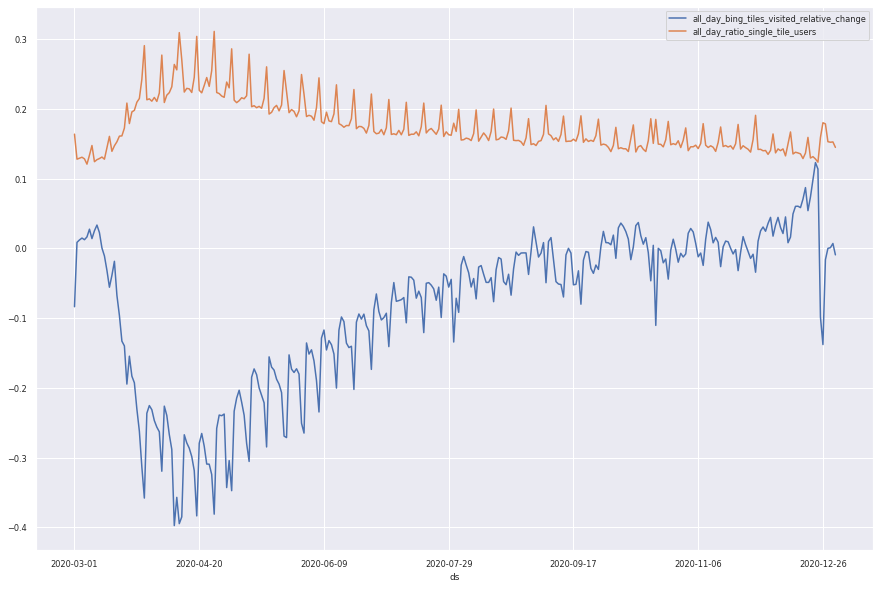

In [19]:
movement_time_df.plot(sharex=True)

## Economic Analysis

In [20]:
economic_df = pd.read_excel('data/economic_county.xlsx')
economic_df.columns = economic_df.iloc[0]
economic_df = economic_df.iloc[1:]
economic_df.head()

,Coun- ty Code,County Name,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,Electricity supply,Water supply; waste collection,Construction,Wholesale and retail trade; repair of motor vehicles,Transport and storage,...,Informa- tion and communi- cation,Financial and insurance activities,Real estate activities,"Profes- sional, technical and support services",Public admin- istration and defence,Education,Human health and social work activities,Other service activities,FISIM1,Total
1,1,MOMBASA,1459,1158,47348,20546,1078,37168,36912,88308,...,5413,31155,35526,7124,12024,4229,4539,2379,-17026,332122
2,2,KWALE,39610,1447,300,730,513,3184,5051,4198,...,879,4941,5733,349,4566,5384,1575,1647,-526,86278
3,3,KILIFI,38319,3334,8456,1471,1353,2233,6037,11411,...,2423,8659,14511,286,6452,9219,2539,2810,-1329,119295
4,4,TANA RIVER,18333,57,11,73,2199,24,3024,924,...,327,2188,752,1,3138,1501,451,608,-158,33498
5,5,LAMU,18699,126,48,340,90,172,2864,4171,...,287,716,1195,10,2129,923,272,257,-167,32386


In [21]:
economic_df.columns

Index(['Coun- ty Code', 'County Name', 'Agriculture, forestry and fishing',
       'Mining and quarrying', 'Manufacturing', 'Electricity supply',
       'Water supply; waste collection', 'Construction',
       'Wholesale and retail trade; repair of motor vehicles',
       'Transport and storage', 'Accom- modation and food service activities',
       'Informa- tion and communi- cation',
       'Financial and insurance activities', 'Real estate activities',
       'Profes- sional, technical and support services',
       'Public admin- istration and defence', 'Education',
       'Human health and social work activities', 'Other service activities',
       'FISIM1', 'Total'],
      dtype='object', name=0)

In [22]:
movement_economic_df = movement_pop_df.merge(economic_df, how='left', left_on='county', right_on='County Name')
movement_economic_df = movement_economic_df[['ds', 'polygon_name', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'county', 'male_population','female_population', 
       'intersex_population','total_population',	'population_density', 'Total']]

movement_economic_df.columns = ['ds', 'polygon_name', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'county', 'male_population','female_population', 
       'intersex_population','total_population',	'population_density', 'total_gcp']
movement_economic_df.head()

,ds,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,county,male_population,female_population,intersex_population,total_population,population_density,total_gcp
0,2020-03-01,Kajiado Central,-0.14277,0.16011,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0,107805
1,2020-03-02,Kajiado Central,-0.18758,0.09824,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0,107805
2,2020-03-03,Kajiado Central,-0.07280,0.12918,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0,107805
3,2020-03-04,Kajiado Central,-0.02168,0.10025,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0,107805
4,2020-03-05,Kajiado Central,-0.01348,0.11649,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0,107805


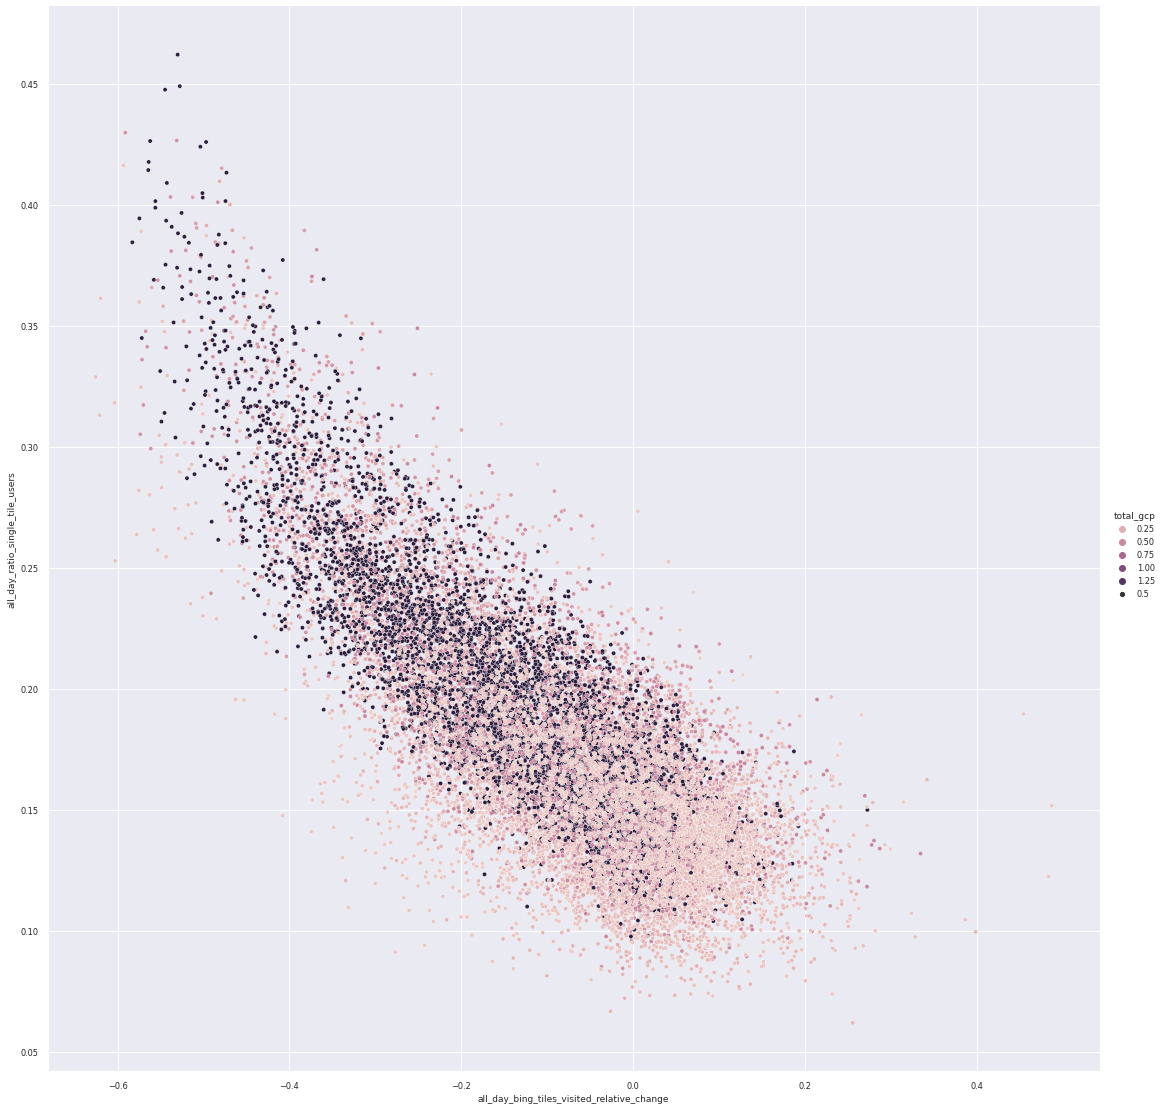

In [23]:
sns.relplot(data=movement_economic_df,x='all_day_bing_tiles_visited_relative_change', y='all_day_ratio_single_tile_users', height=15.5, aspect=1, hue='total_gcp', size=0.5)

In [24]:
movement_economic_df

,ds,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,county,male_population,female_population,intersex_population,total_population,population_density,total_gcp
0,2020-03-01,Kajiado Central,-0.14277,0.16011,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0,107805
1,2020-03-02,Kajiado Central,-0.18758,0.09824,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0,107805
2,2020-03-03,Kajiado Central,-0.07280,0.12918,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0,107805
3,2020-03-04,Kajiado Central,-0.02168,0.10025,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0,107805
4,2020-03-05,Kajiado Central,-0.01348,0.11649,KAJIADO,81514.0,80343.0,NaN,161862.0,38.0,107805
...,...,...,...,...,...,...,...,...,...,...,...
21660,2020-12-10,Isiolo North,-0.04408,0.15741,ISIOLO,NaN,NaN,NaN,NaN,NaN,15850
21661,2020-12-11,Isiolo North,0.01453,0.16013,ISIOLO,NaN,NaN,NaN,NaN,NaN,15850
21662,2020-12-16,Isiolo North,0.12100,0.11263,ISIOLO,NaN,NaN,NaN,NaN,NaN,15850
21663,2020-12-18,Isiolo North,0.12762,0.15152,ISIOLO,NaN,NaN,NaN,NaN,NaN,15850


In [25]:
county_movement_df = movement_economic_df.groupby('county').agg({
    'all_day_bing_tiles_visited_relative_change':'mean',
    'all_day_ratio_single_tile_users':'mean',
    'population_density':'mean',
    'total_gcp':'mean',
    })
county_movement_df = county_movement_df.reset_index()
county_movement_df

,county,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,population_density,total_gcp
0,BOMET,-0.090075,0.182805,473.000000,159569.0
1,BUNGOMA,-0.019372,0.148620,NaN,183509.0
2,BUSIA,-0.156082,0.134415,NaN,86712.0
3,EMBU,-0.029422,0.146083,NaN,103734.0
4,GARISSA,0.036256,0.158739,NaN,39394.0
5,HOMA BAY,-0.061608,0.128020,NaN,114198.0
6,ISIOLO,-0.066436,0.180591,NaN,15850.0
7,KAJIADO,-0.134220,0.195327,1587.536178,107805.0
8,KAKAMEGA,-0.042012,0.127757,NaN,182563.0
9,KERICHO,-0.043489,0.140246,NaN,136799.0


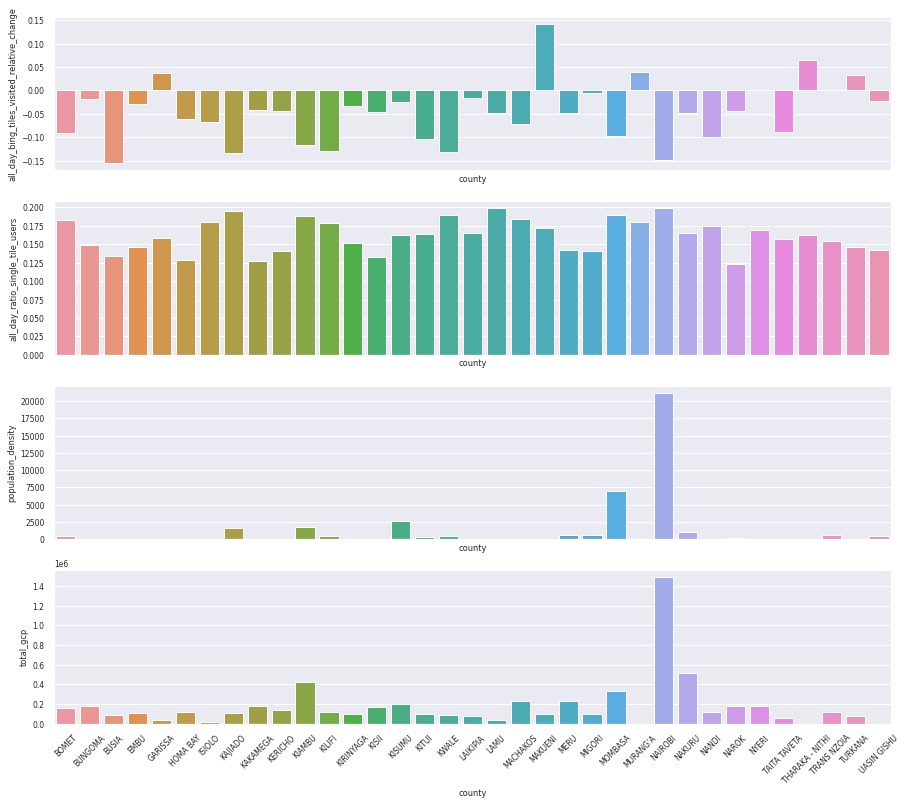

In [26]:
# county_movement_df.plot(sharex=True, kind='bar')
plt.rcParams["figure.figsize"] = 15,13

sns.set(font_scale = 0.69)
f, axarr = plt.subplots(4, sharex=True)
sns.barplot(x="county", y="all_day_bing_tiles_visited_relative_change", data=county_movement_df, ax=axarr[0])
sns.barplot(x="county", y="all_day_ratio_single_tile_users", data=county_movement_df, ax=axarr[1])
sns.barplot(x="county", y="population_density", data=county_movement_df, ax=axarr[2])
sns.barplot(x="county", y="total_gcp", data=county_movement_df, ax=axarr[3])
_ = plt.xticks(rotation=45)

### **Correlation**

<AxesSubplot:>

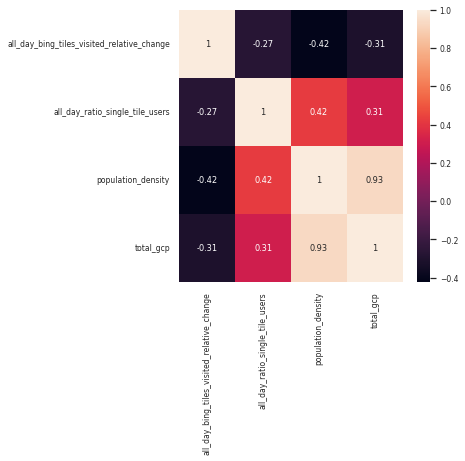

In [27]:
plt.rcParams["figure.figsize"] = 5,5
sns.heatmap(county_movement_df.corr(), annot=True)

In [28]:
county_movement_df.columns

Index(['county', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'population_density', 'total_gcp'],
      dtype='object')

### **Data distribution**

In [29]:
movement_economic_df.columns

Index(['ds', 'polygon_name', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'county', 'male_population',
       'female_population', 'intersex_population', 'total_population',
       'population_density', 'total_gcp'],
      dtype='object')

In [30]:
movement_economic_df_2 = movement_economic_df[['ds', 'polygon_name', 'all_day_bing_tiles_visited_relative_change',
                                            'all_day_ratio_single_tile_users', 'county', 'total_population', 'population_density', 'total_gcp']]

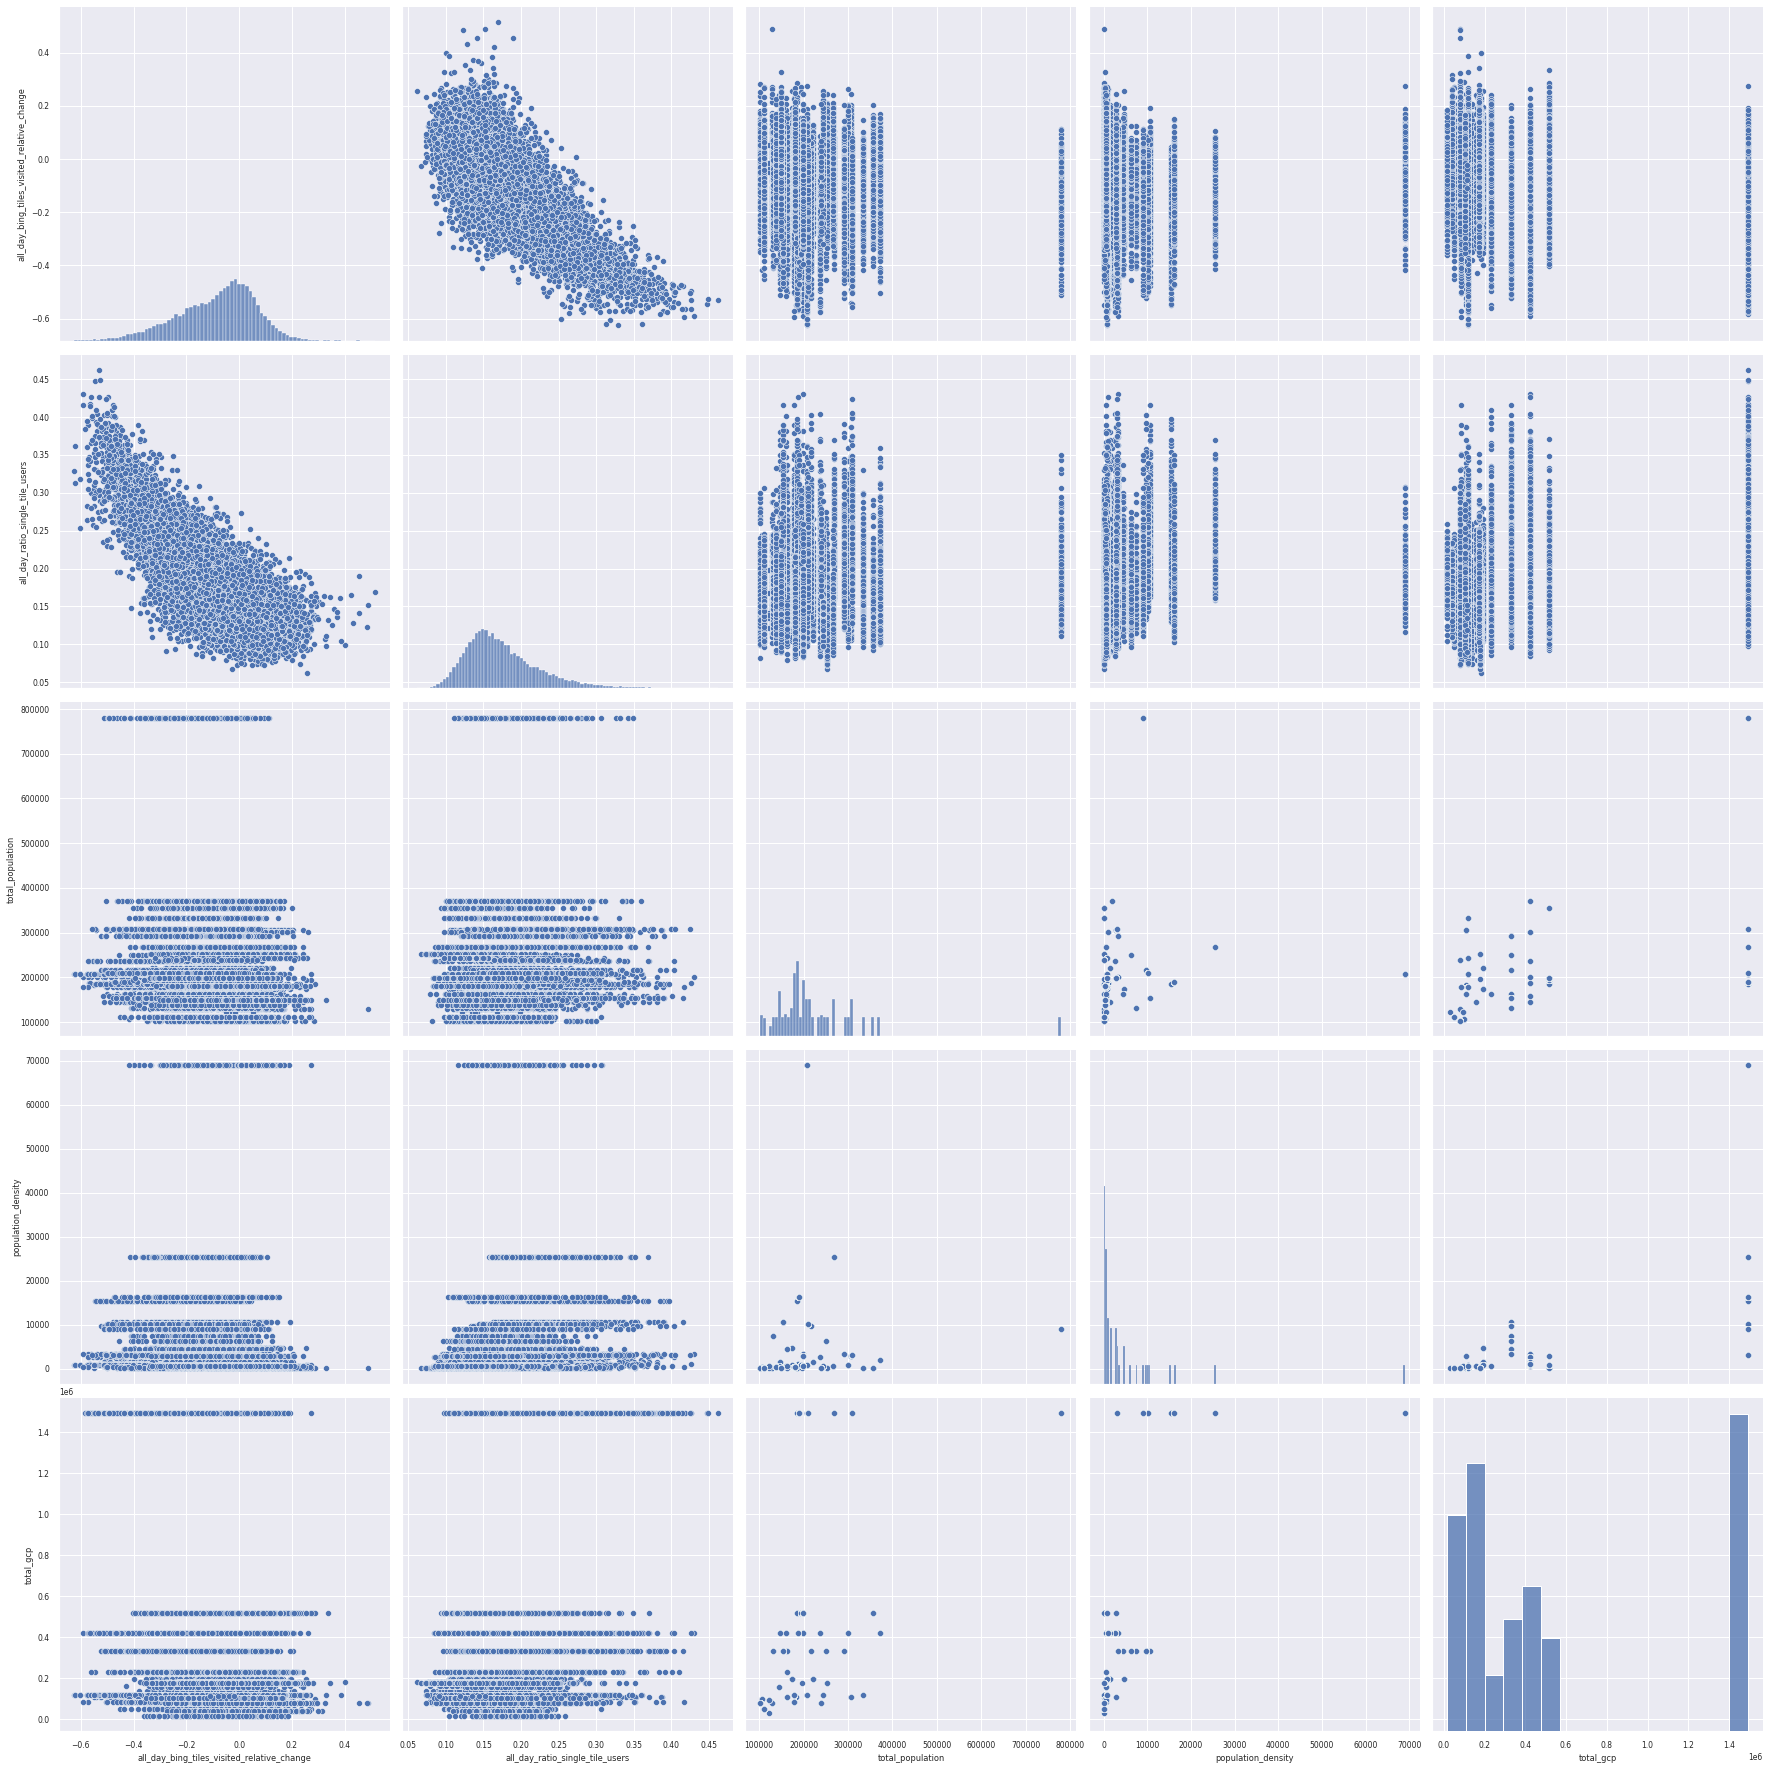

In [31]:
sns.pairplot(movement_economic_df_2, aspect=1, height=5)

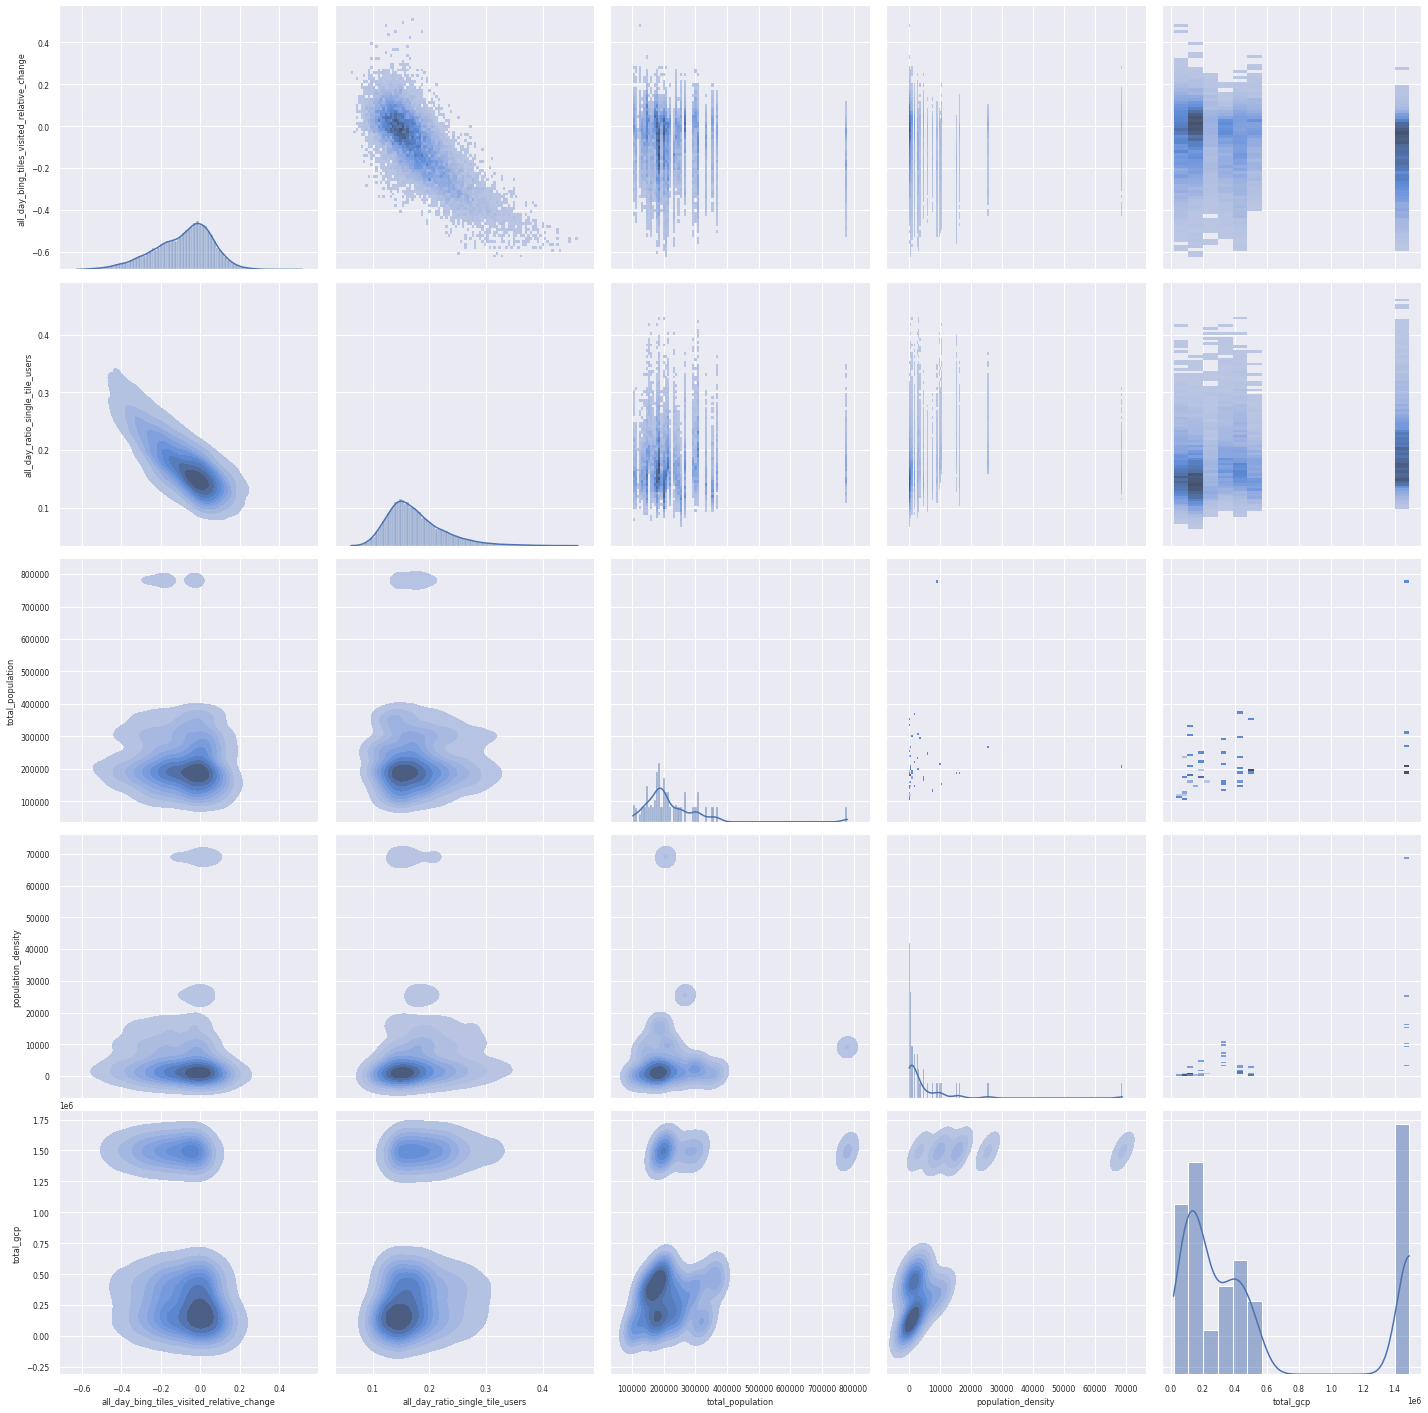

In [32]:
g = sns.PairGrid(movement_economic_df_2, aspect=1, height=4)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

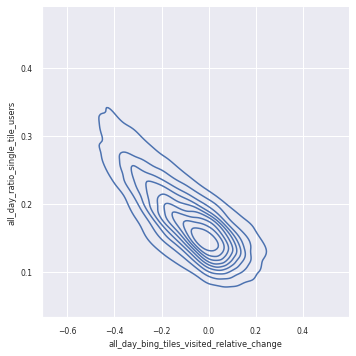

In [33]:
plt.rcParams["figure.figsize"] = 10,20
sns.displot(data=movement_economic_df_2, kind='kde', x='all_day_bing_tiles_visited_relative_change', y='all_day_ratio_single_tile_users')

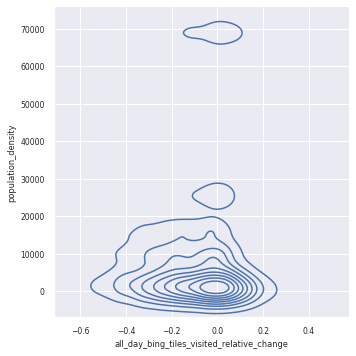

In [34]:
plt.rcParams["figure.figsize"] = 10,20
sns.displot(data=movement_economic_df_2, kind='kde', x='all_day_bing_tiles_visited_relative_change', y='population_density')

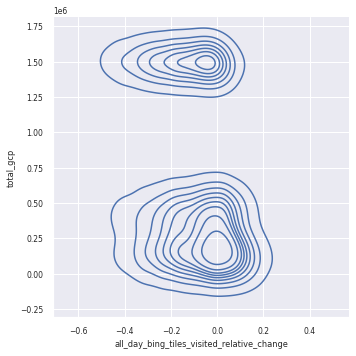

In [35]:
plt.rcParams["figure.figsize"] = 10,20
sns.displot(data=movement_economic_df_2, kind='kde', x='all_day_bing_tiles_visited_relative_change', y='total_gcp')

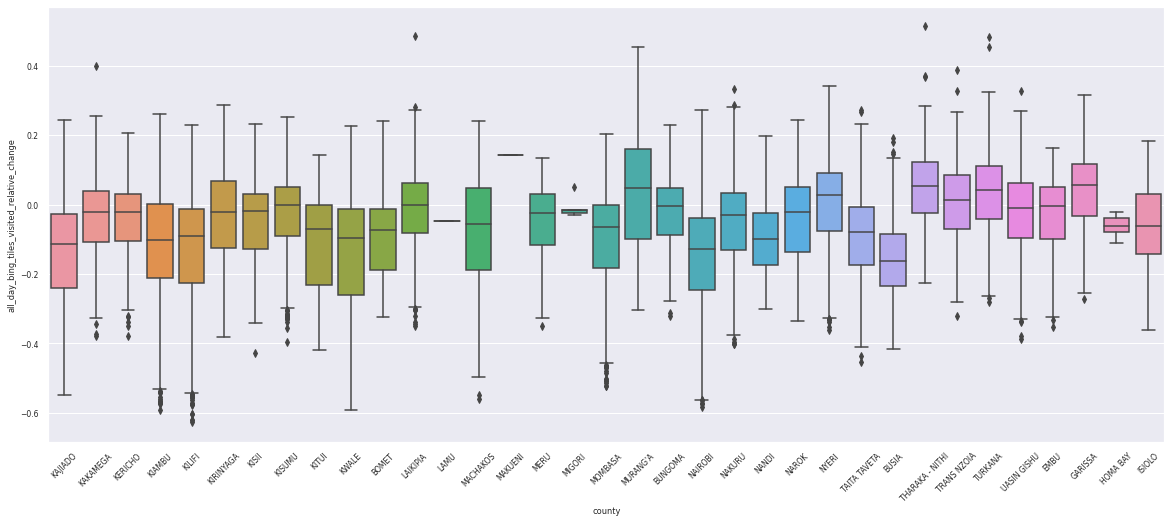

In [36]:
plt.rcParams["figure.figsize"] = 20,8
sns.boxplot(data=movement_economic_df_2, y='all_day_bing_tiles_visited_relative_change', x='county')
_ = plt.xticks(rotation=45)

In [37]:
movement_economic_df_2.columns

Index(['ds', 'polygon_name', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users', 'county', 'total_population',
       'population_density', 'total_gcp'],
      dtype='object')

In [44]:
county_dist = movement_merged_df['county'].value_counts()


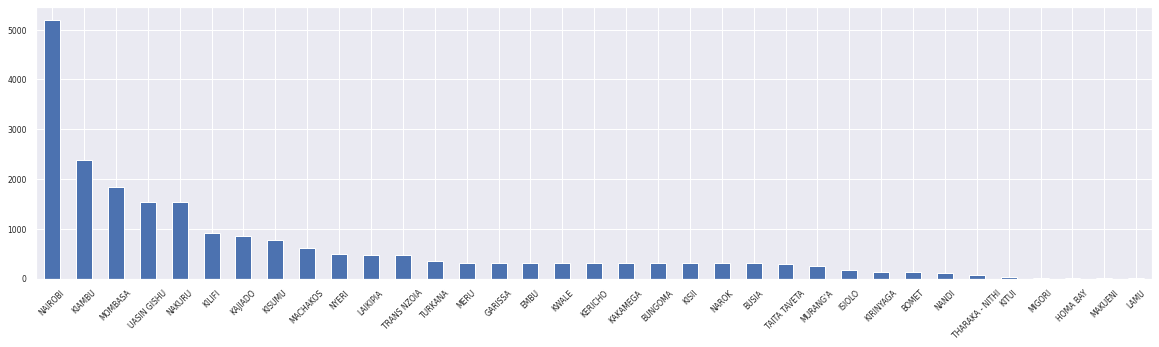

In [49]:
plt.rcParams["figure.figsize"] = 20,5
county_dist.plot(kind='bar')
_ = plt.xticks(rotation=45)